In [6]:
# importing pytorch
import torch

# main plotting library
import matplotlib.pyplot as plt

# for linear algebra calculations 
import numpy as np
from itertools import product

# for 3d plots
from mpl_toolkits.mplot3d import Axes3D, art3d

# for rendering points on 3d plots
from matplotlib.patches import Circle

# for interactive visuals
from ipywidgets import interact, IntSlider, fixed

# for animations
from matplotlib.animation import FuncAnimation

# for comparisons
from math import inf #this is Infinity in JS

# importing the code from the main notebook
# code for all functions imported here can be viewed in Linear_Regression_Tutorial.ipynb in the same directory
import nbimporter
from Linear_Regression_Tutorial import animate_parabola_tangents, graph_line, graph_data_line_surface_loss, graph_data_line_loss, loss_maker, animateTriPlot, randomChooser, gradientDescentChooser, generate_random_linear_data

Importing Jupyter notebook from Linear_Regression_Tutorial.ipynb


In [7]:
%matplotlib inline

# Linear Regression

This notebook pulls out the interesting interactive pieces from the Linear_Regression_Tutorial Notebook for the purpose of having a concise presentation of the key points of Linear Regression without having to look at all of it's guts. It was mainly developed so that it could be used during a lecture to give the main idea without getting lost in the weeds of implementation details.

## The problem:

Given some linear data (Data that was generated by some phenomenon that fits closely to a line, plus or minus some noise), can we find the line that fits the data?

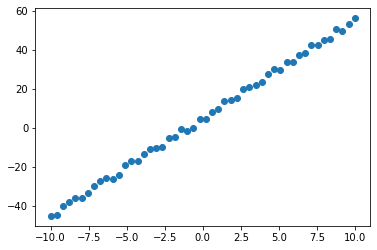

In [29]:
# re-run this cell to generate new data for the interactions
SECRET_SLOPE, SECRET_INTERCEPT = np.random.randint(-10, 10), np.random.randint(-10, 10)
SECRET_DATA = generate_random_linear_data(SECRET_SLOPE, SECRET_INTERCEPT, n=50, noise_range=2)

X, Y = SECRET_DATA
plt.scatter(X, Y)

## The answer: Machine Learning!

It's not immediately obvious how to choose a good line from a data set of lines. However, it seems pretty intuitive to us to choose a line that fits the data. When humans can do it intuitively, but can't explain in technical detail how its done, that's a perfect candidate for Machine Learning! 

Recall, the three pieces for a Machine Learning Algorithm are:
    1. Generating the possible answers
    2. Identifying good and bad candidates
    3. Finding a method for choosing better candidates
    
We will try to exploit the fact that our problem is _linear_ to make these steps efficient.

### Generating the possible answers

What are the set of possible answers for the linear regression problem? The set of all possible lines of course! 

Recall that the equation of a line is: $y = mx+b$

In [13]:
def line_maker(slope, y_intercept):
    line = lambda x: (slope * x) + y_intercept # in JS (x => slope * x + y_intercept)
    return line

In [14]:
interact(graph_line, slope=1.0, y_intercept=2)

interactive(children=(FloatSlider(value=1.0, description='slope', max=3.0, min=-1.0), IntSlider(value=2, descr…

<function Linear_Regression_Tutorial.graph_line(slope, y_intercept)>

In [23]:
X, Y = SECRET_DATA
line = line_maker(1, 1)

print(X, line(X))

[-10.          -9.59183673  -9.18367347  -8.7755102   -8.36734694
  -7.95918367  -7.55102041  -7.14285714  -6.73469388  -6.32653061
  -5.91836735  -5.51020408  -5.10204082  -4.69387755  -4.28571429
  -3.87755102  -3.46938776  -3.06122449  -2.65306122  -2.24489796
  -1.83673469  -1.42857143  -1.02040816  -0.6122449   -0.20408163
   0.20408163   0.6122449    1.02040816   1.42857143   1.83673469
   2.24489796   2.65306122   3.06122449   3.46938776   3.87755102
   4.28571429   4.69387755   5.10204082   5.51020408   5.91836735
   6.32653061   6.73469388   7.14285714   7.55102041   7.95918367
   8.36734694   8.7755102    9.18367347   9.59183673  10.        ] [-9.         -8.59183673 -8.18367347 -7.7755102  -7.36734694 -6.95918367
 -6.55102041 -6.14285714 -5.73469388 -5.32653061 -4.91836735 -4.51020408
 -4.10204082 -3.69387755 -3.28571429 -2.87755102 -2.46938776 -2.06122449
 -1.65306122 -1.24489796 -0.83673469 -0.42857143 -0.02040816  0.3877551
  0.79591837  1.20408163  1.6122449   2.02040816

### Identifying good candidates

We need a way to determine how good a particular line is. Our first guess is probably a good one – see how wrong the given line is for each data point, and add it all together!

There's some mathematical details, like squaring to make sure the values are positive (and differentiable), and dividing by the length of the data so the loss function looks similar for different sized data sets. This loss function (math details and all) is typically called the root-mean-square loss, or mse loss.

In [25]:
# This function determines how "good" a line is by measuring 
# how wrong the line's prediction is for every data point.
# Golf scoring rules – lower values are better.
def loss(data, line):
    total_loss = 0
    X, Y = data
    predictions = line(X)
    individual_losses = (predictions - Y) ** 2 # squaring makes sure the value is positive
    total_squared_loss = sum(individual_losses)
    root_mean_square_loss = (total_squared_loss ** 0.5) / len(data)
    return root_mean_square_loss

In [30]:
interact(
    graph_data_line_loss, 
    data=fixed(SECRET_DATA),
    slope=IntSlider(min=-10, max=10, step=1, value=0), 
    y_intercept=IntSlider(min=-10, max=10, step=1, value=0)
)

interactive(children=(IntSlider(value=0, description='slope', max=10, min=-10), IntSlider(value=0, description…

<function Linear_Regression_Tutorial.graph_data_line_loss(data, slope, y_intercept)>

In [31]:
print(SECRET_SLOPE, SECRET_INTERCEPT)

5 5


### A more complete visualization

If we organize the parameters for the lines (slope, y_intercept) into an x-y plane, and then plot the loss for each choice of parameter along the z-axis, we can generate a surface that shows us visually where good lines and bad lines are!

In [32]:
interact(
    graph_data_line_surface_loss, 
    data=fixed(SECRET_DATA),
    slope=IntSlider(min=-10, max=10, step=1, value=0), 
    y_intercept=IntSlider(min=-10, max=10, step=1, value=0)
)

interactive(children=(IntSlider(value=0, description='slope', max=10, min=-10), IntSlider(value=0, description…

<function Linear_Regression_Tutorial.graph_data_line_surface_loss(data, slope, y_intercept)>

### Choosing better candidates

The last step is to figure out how to choose better candidates. We see two ways in which this can be done:
    1. Try everything and hope for the best (randomChooser)
    2. Try something at random, and intelligently choose a better neighbor. (gradientDescent)


In [35]:
# May need to be run several times before the animations will work.
# If push comes to shove, restart the kernal using the circular arrow button at the top.
%matplotlib notebook

In [47]:
# run this cell to generate new data for the animations
SECRET_SLOPE, SECRET_INTERCEPT = np.random.randint(-10, 10), np.random.randint(-10, 10)
animation_data = generate_random_linear_data(SECRET_SLOPE, SECRET_INTERCEPT, 50, 2)

<IPython.core.display.Javascript object>


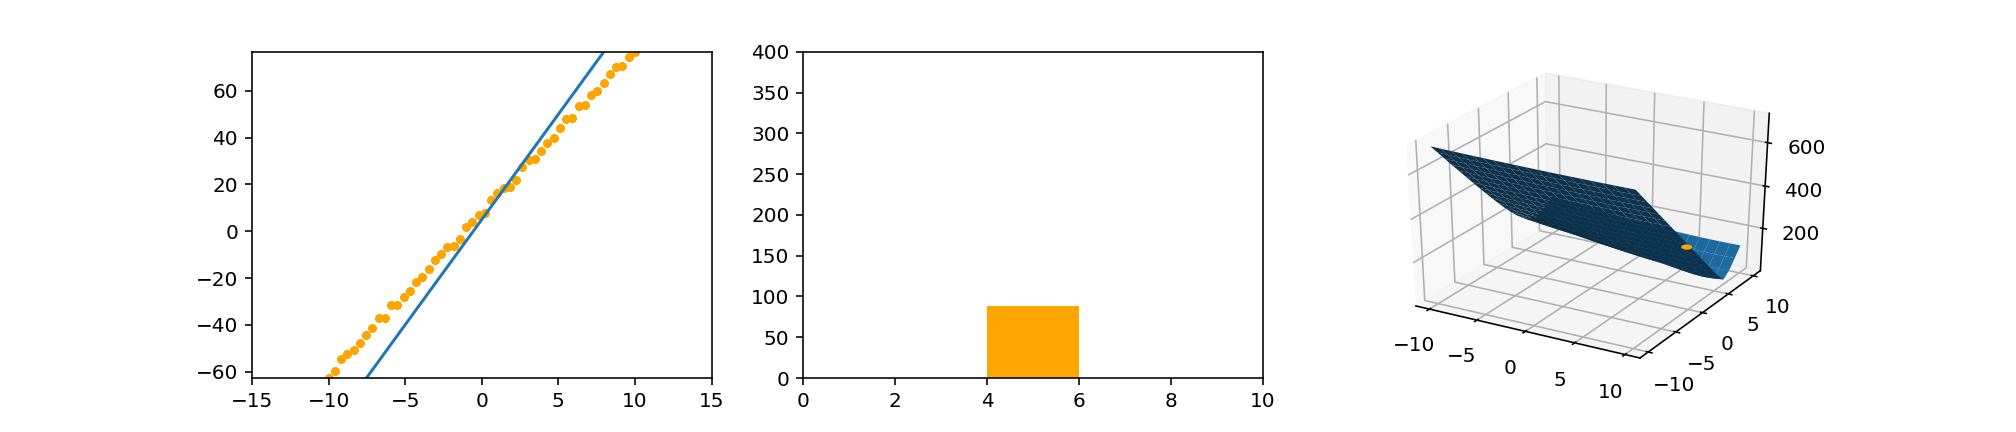

In [40]:
rand_initial_state = {
    'loss_function': loss_maker(animation_data), 
    'best_pair': (None, None), 
    'best_value': inf, 
    'last_step': 9, 
    'current_step': 0,
}


animateTriPlot(animation_data, randomChooser, initial_state=rand_initial_state)

<IPython.core.display.Javascript object>


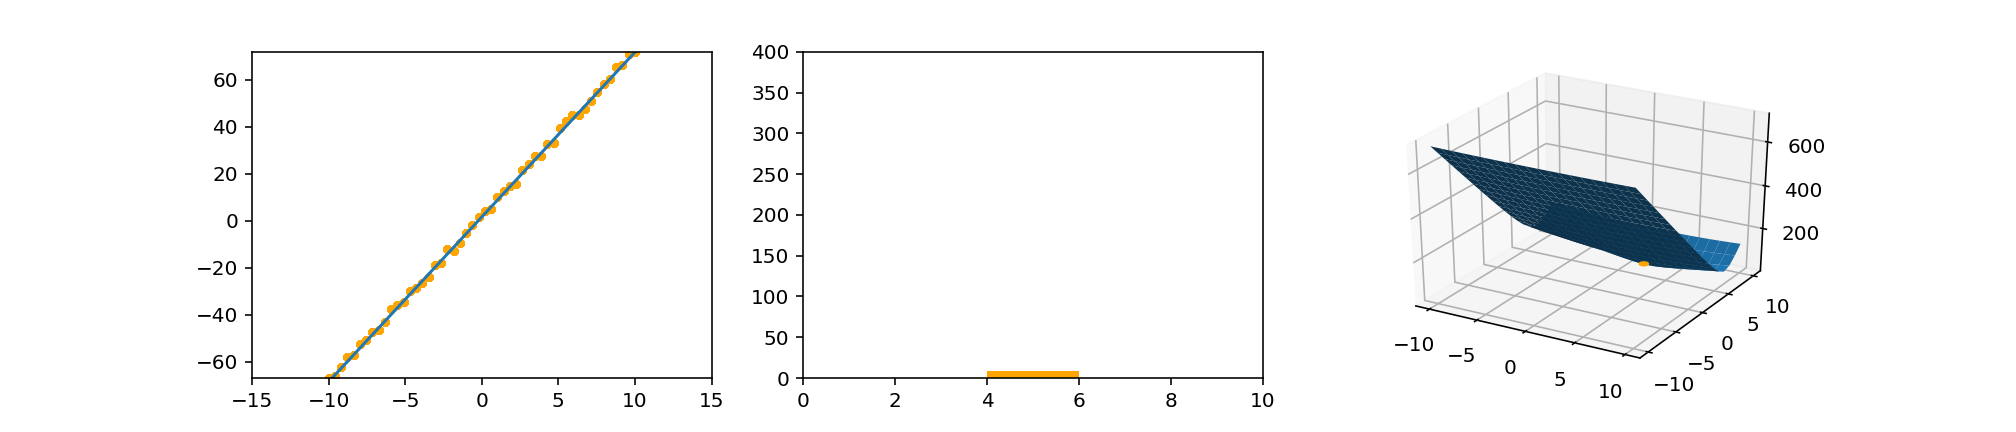

In [49]:
GD_initial_state = {
    'first_step': True,
    'data': animation_data,
    'current_pair': (0, 0),
    'learning_rate': 0.015,
}

animateTriPlot(animation_data, gradientDescentChooser, initial_state=GD_initial_state, steps=50, delay=50)

<IPython.core.display.Javascript object>


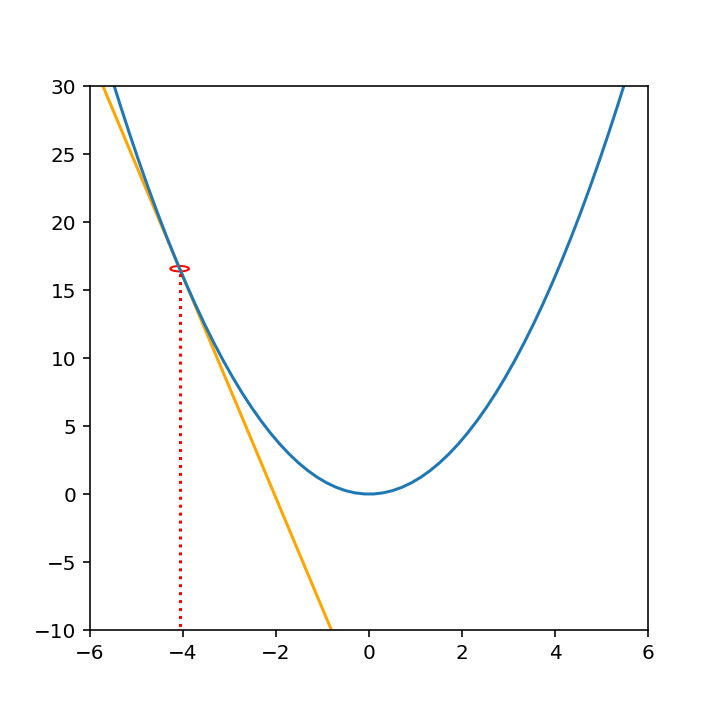

In [50]:
animate_parabola_tangents()